In [132]:
%load_ext autoreload
%autoreload 2

import qc_utils as utils
import cirq
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
A=1.0
D=1.0
N_portfolio = 3

portfolio1 = utils.Portfolio(N_portfolio=N_portfolio)

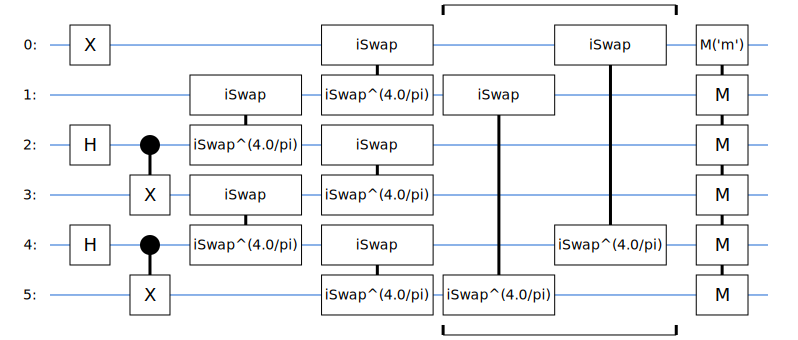

In [92]:
circuit = cirq.Circuit()
circuit=portfolio1.prepare_AOA_initial_state(circuit,D=D)
circuit=portfolio1.apply_AOA_mixing_operator(circuit,beta=1)
circuit=portfolio1.apply_measurements(circuit,key='m')
SVGCircuit(circuit)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


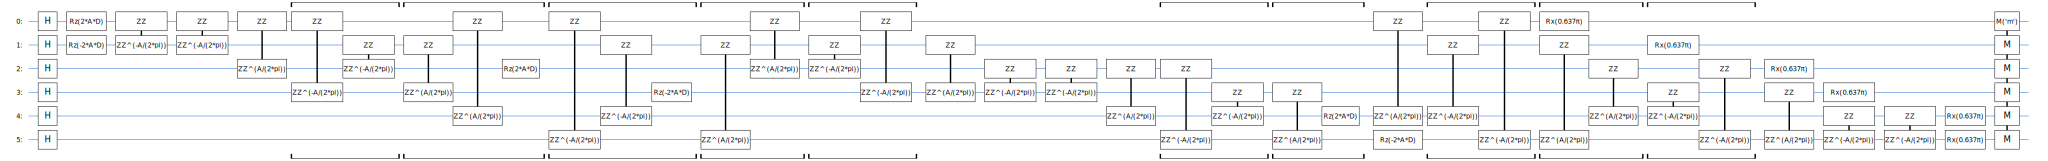

In [3]:
A=1.0
D=2.0
n_trials = 10

circuit = cirq.Circuit()
circuit = portfolio1.apply_hadamard(circuit)
circuit = portfolio1.apply_soft_constraint(circuit,gamma=1)
circuit = portfolio1.apply_QAOA_mixing_operator(circuit,beta=1)
circuit = portfolio1.apply_measurements(circuit)

SVGCircuit(circuit)

In [4]:
n_trials = 50

A = 10.0
D = 1.0


Emin = 1e10

for beta in np.linspace(-np.pi,np.pi,50):
    for gamma in np.linspace(-2.0*np.pi,2*np.pi,50):
        circuit = cirq.Circuit()
        circuit = portfolio1.apply_hadamard(circuit)
        circuit = portfolio1.apply_soft_constraint(circuit,gamma=gamma)
        circuit = portfolio1.apply_QAOA_mixing_operator(circuit,beta=beta)
        circuit = portfolio1.apply_measurements(circuit)
        bitstrings = portfolio1.measure_circuit(circuit,A=A,D=D,n_trials=n_trials)
        portfolio_holdings = portfolio1.convert_bitstrings_to_portfolio_holdings(bitstrings)
        qubit_results = portfolio1.count_instances(bitstrings)
        Ek =  portfolio1.compute_penalty_expectation_value(A,D,portfolio_holdings)
        
        
        if(Ek < Emin):
            Emin = Ek
            gamma_0 = gamma
            beta_0 = beta
            portfolio_holdings_0 = portfolio_holdings
            qubit_results_0 = qubit_results
            print(Emin,gamma_0,beta_0)

23.4 -6.283185307179586 -3.141592653589793
23.399999999999995 -5.257359134578838 -3.141592653589793
23.199999999999996 -5.00090259142865 -3.141592653589793
19.8 -3.20570678937734 -3.141592653589793
19.199999999999996 -1.1540544441758431 -3.141592653589793
18.599999999999998 3.2057067893773397 -3.141592653589793
16.2 -5.257359134578838 -3.0133643820146996
16.0 -3.462163332527527 -3.0133643820146996
13.799999999999997 -2.1798806167765914 -3.0133643820146996
12.8 -1.9234240736264043 -3.0133643820146996
9.8 4.744446048278462 -3.0133643820146996
9.4 -0.8975979010256552 -2.885136110439606
5.8 4.744446048278462 -2.885136110439606
4.4 5.00090259142865 -2.885136110439606
3.8000000000000003 -4.744446048278463 -0.32057067893773405
3.2 -1.9234240736264043 0.3205706789377336


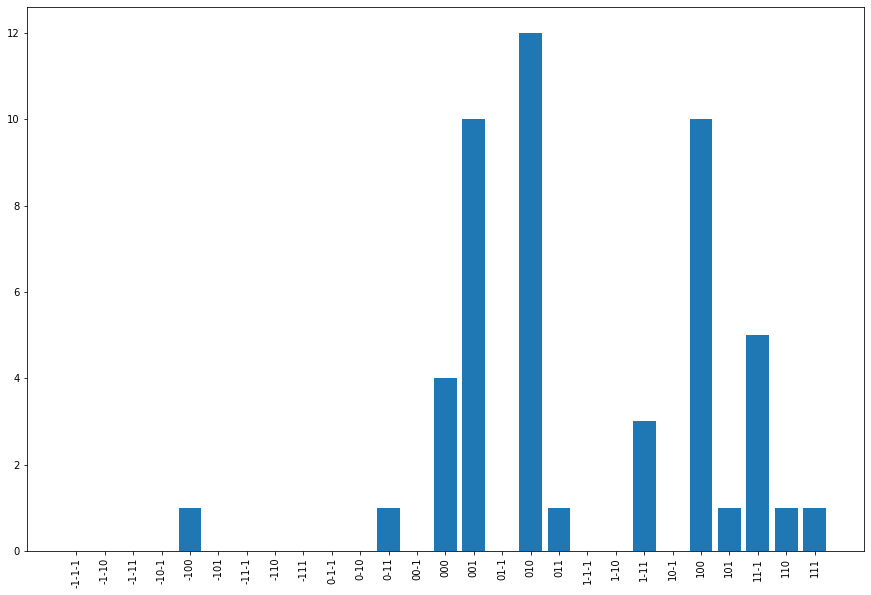

In [5]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(portfolio_holdings_0['labels'])), portfolio_holdings_0['counts'], tick_label=portfolio_holdings_0['labels'])
plt.xticks(rotation=90)
plt.show()

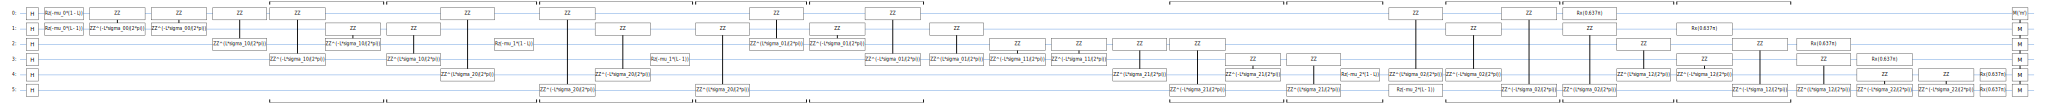

In [6]:
circuit = cirq.Circuit()
circuit = portfolio1.apply_hadamard(circuit)
circuit = portfolio1.apply_portfolio_lagrangian(circuit,gamma=1)
circuit = portfolio1.apply_QAOA_mixing_operator(circuit,beta=1)
circuit = portfolio1.apply_measurements(circuit)

SVGCircuit(circuit)

In [130]:
n_trials = 100

lam = 0.0

mu = np.zeros(N_portfolio)
mu[0]=1.0

sigma = np.zeros((N_portfolio,N_portfolio))

for i in range(len(sigma)):
    sigma[i,i] = 10.0

sigma[N_portfolio-2,N_portfolio-2] = 0.01


Emin = 1e10

for beta in np.linspace(-np.pi,np.pi,10):
    for gamma in np.linspace(-2.0*np.pi,2*np.pi,10):
        circuit = cirq.Circuit()
        circuit = portfolio1.apply_hadamard(circuit)
        circuit = portfolio1.apply_portfolio_lagrangian(circuit,gamma=gamma)
        circuit = portfolio1.apply_QAOA_mixing_operator(circuit,beta=beta)
        circuit = portfolio1.apply_measurements(circuit)
        bitstrings = portfolio1.measure_circuit(circuit,mu=mu,sigma=sigma,lam=lam,n_trials=n_trials)
        portfolio_holdings = portfolio1.convert_bitstrings_to_portfolio_holdings(bitstrings)
        qubit_results = portfolio1.count_instances(bitstrings)
        Ek =  portfolio1.compute_portfolio_cost_expectation_value(lam,mu,sigma,portfolio_holdings)
        
        
        if(Ek < Emin):
            Emin = Ek
            gamma_0 = gamma
            beta_0 = beta
            portfolio_holdings_0 = portfolio_holdings
            qubit_results_0 = qubit_results
            print(Emin,gamma_0,beta_0)

0.07000000000000003 -6.283185307179586 -3.141592653589793
0.04000000000000002 -4.886921905584122 -3.141592653589793
0.009999999999999974 -3.490658503988659 -3.141592653589793
-0.040000000000000015 -2.0943951023931957 -3.141592653589793
-0.06 0.6981317007977319 -3.141592653589793
-0.06999999999999998 2.094395102393195 -3.141592653589793
-0.07000000000000003 3.4906585039886586 -3.141592653589793
-0.99 -4.886921905584122 -2.443460952792061


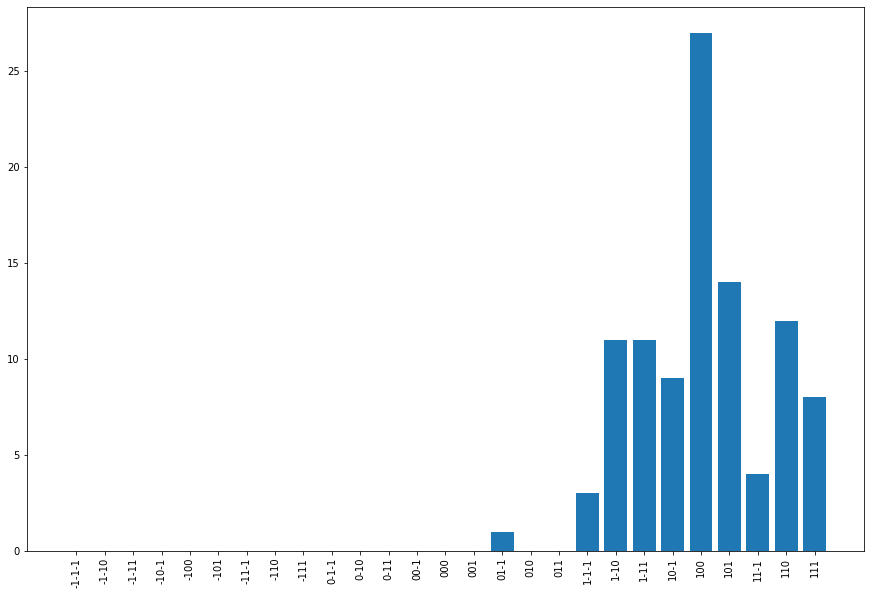

In [131]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(portfolio_holdings_0['labels'])), portfolio_holdings_0['counts'], tick_label=portfolio_holdings_0['labels'])
plt.xticks(rotation=90)
plt.show()

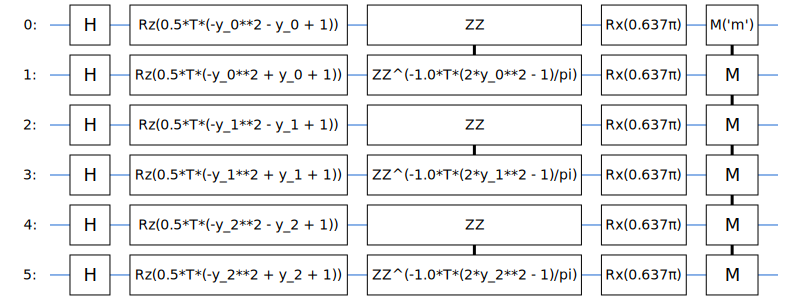

In [9]:
circuit = cirq.Circuit()
circuit = portfolio1.apply_hadamard(circuit)
circuit = portfolio1.apply_transaction_cost(circuit,gamma=1)
circuit = portfolio1.apply_QAOA_mixing_operator(circuit,beta=1)
circuit = portfolio1.apply_measurements(circuit)

SVGCircuit(circuit)

In [10]:
n_trials = 100

lam = 1.0

y = np.zeros(N_portfolio)
y[0]=1.0
y[-1]=-1.0

T =100.0


Emin = 1e10

for beta in np.linspace(-np.pi,np.pi,10):
    for gamma in np.linspace(-2.0*np.pi,2*np.pi,10):
        circuit = cirq.Circuit()
        circuit = portfolio1.apply_hadamard(circuit)
        circuit = portfolio1.apply_transaction_cost(circuit,gamma=gamma)
        circuit = portfolio1.apply_QAOA_mixing_operator(circuit,beta=beta)
        circuit = portfolio1.apply_measurements(circuit)
        bitstrings = portfolio1.measure_circuit(circuit,mu=mu,sigma=sigma,lam=lam,y=y,T=T,n_trials=n_trials)
        portfolio_holdings = portfolio1.convert_bitstrings_to_portfolio_holdings(bitstrings)
        qubit_results = portfolio1.count_instances(bitstrings)
        Ek =  portfolio1.compute_transaction_cost_expectation_value(T,y,portfolio_holdings)
        
        
        if(Ek < Emin):
            Emin = Ek
            gamma_0 = gamma
            beta_0 = beta
            portfolio_holdings_0 = portfolio_holdings
            qubit_results_0 = qubit_results
            print(Emin,gamma_0,beta_0)

198.0 -6.283185307179586 -3.141592653589793
192.0 -2.0943951023931957 -3.141592653589793
191.0 -0.6981317007977319 -3.141592653589793
121.0 -4.886921905584122 -2.443460952792061
102.0 2.094395102393195 -2.443460952792061
16.0 3.4906585039886586 -2.443460952792061


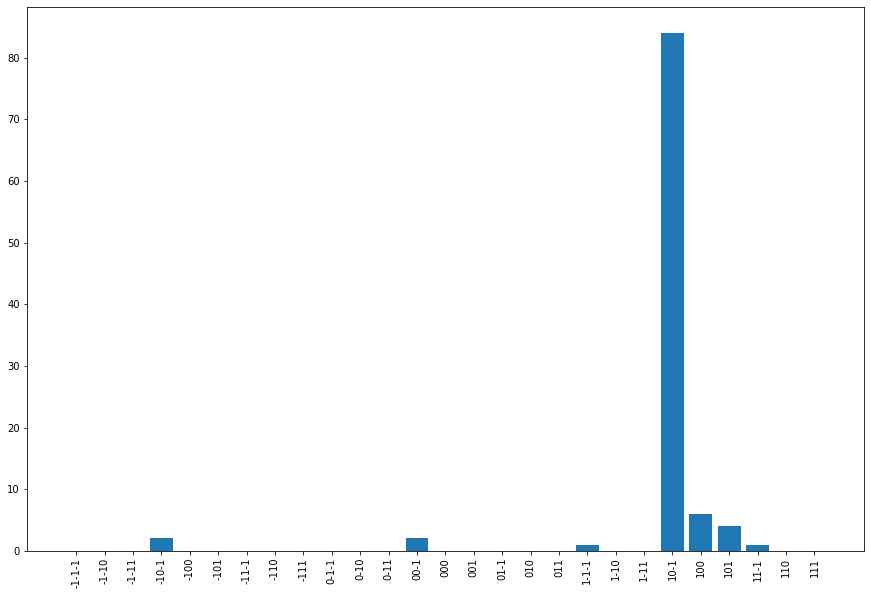

In [11]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(portfolio_holdings_0['labels'])), portfolio_holdings_0['counts'], tick_label=portfolio_holdings_0['labels'])
plt.xticks(rotation=90)
plt.show()

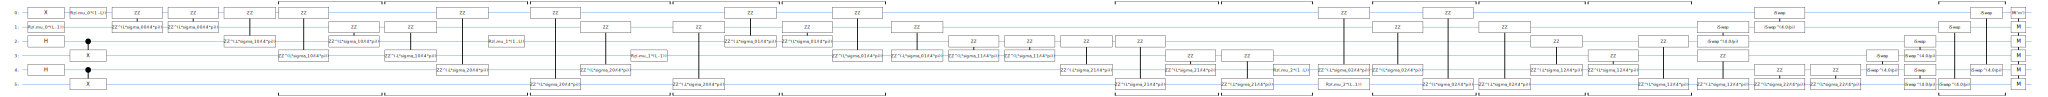

In [110]:
circuit = cirq.Circuit()
circuit=portfolio1.prepare_AOA_initial_state(circuit,D=D)
circuit = portfolio1.apply_portfolio_lagrangian(circuit,gamma=1)
circuit=portfolio1.apply_AOA_mixing_operator(circuit,beta=1)
circuit=portfolio1.apply_measurements(circuit,key='m')
SVGCircuit(circuit)

In [151]:
%load_ext autoreload
%autoreload 2

import qc_utils as utils
import cirq
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import numpy as np



n_trials = 100

A = 10.0
D = 2.0


lam = 0.5

mu = np.ones(N_portfolio)
mu[1]=10.0
mu[2]=10.0


sigma = np.zeros((N_portfolio,N_portfolio))

for i in range(len(sigma)):
    sigma[i,i] = 1.0

#sigma[1,1] = 0.01


Emin = 1e10

for beta in np.linspace(-np.pi,np.pi,30):
    for gamma in np.linspace(-2.0*np.pi,2*np.pi,30):
        circuit = cirq.Circuit()
        circuit=portfolio1.prepare_AOA_initial_state(circuit,D=D)
        circuit = portfolio1.apply_portfolio_lagrangian(circuit,gamma=gamma)
        circuit=portfolio1.apply_AOA_mixing_operator(circuit,beta=beta)
        
        circuit = portfolio1.apply_measurements(circuit)
        bitstrings = portfolio1.measure_circuit(circuit,D=D,mu=mu,lam=lam,sigma=sigma,n_trials=n_trials)
        portfolio_holdings = portfolio1.convert_bitstrings_to_portfolio_holdings(bitstrings)
        qubit_results = portfolio1.count_instances(bitstrings)
        Ek = portfolio1.compute_portfolio_cost_expectation_value(lam,mu,sigma,portfolio_holdings)
        
        
        if(Ek < Emin):
            Emin = Ek
            gamma_0 = gamma
            beta_0 = beta
            portfolio_holdings_0 = portfolio_holdings
            qubit_results_0 = qubit_results
            print(Emin,gamma_0,beta_0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-4.5 -6.283185307179586 -3.141592653589793
-5.31 -6.283185307179586 -2.9249310912732556
-5.355 -5.416539057913436 -2.9249310912732556
-5.535 -6.283185307179586 -2.708269528956718
-5.760000000000001 -5.849862182546511 -2.708269528956718
-6.030000000000001 -4.116569684014212 -2.708269528956718
-6.075 6.283185307179586 -2.708269528956718


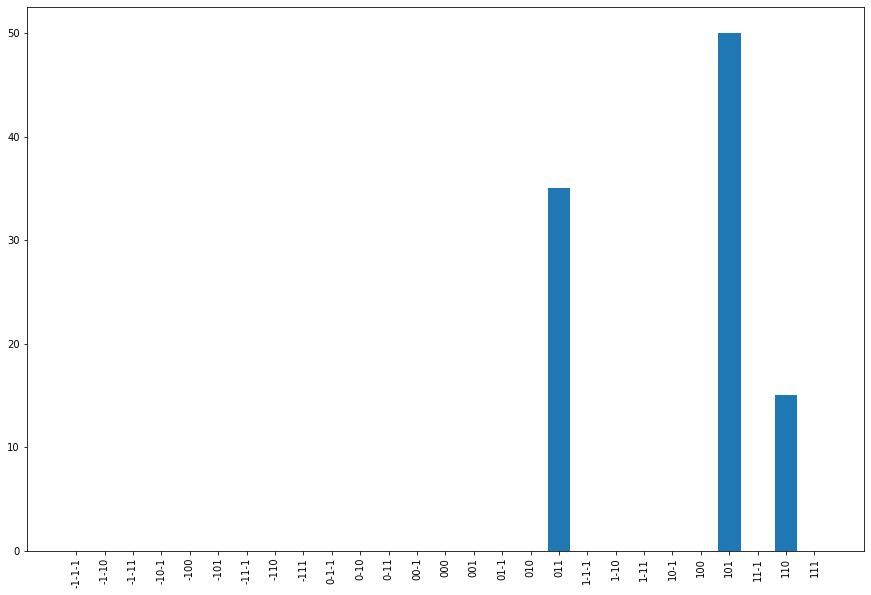

In [152]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(portfolio_holdings_0['labels'])), portfolio_holdings_0['counts'], tick_label=portfolio_holdings_0['labels'])
plt.xticks(rotation=90)
plt.show()